# Analysis and Informal Plotting of Mouse Tracking Data

Before doing any of the Python snippets below, must first use `process.py` to parse raw data and generate a number of data files: 
- `processed.csv`, which contains the summary statistics
- `nx.csv`, `ny.csv`, `rx.csv`, and `rx.csv`, which contain the actual processed mouse trajectories.

Note: before process.py can operate correctly, there are a few trials that must be manually removed from CSV files.  They are listed in data/notes.md





In [1]:
import os 
import glob

import numpy as np # Numeric calculation
import pandas as pd # General purpose data analysis library
import squeak # For mouse data

# For plotting
import matplotlib.pyplot as plt 
%matplotlib inline
# Prettier default settings for plots (optional)
import seaborn
seaborn.set_style('white')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('processed.csv') # import data from preprocessed CSV files
nx = pd.read_csv('nx.csv')
ny = pd.read_csv('ny.csv')
rx = pd.read_csv('rx.csv')
ry = pd.read_csv('ry.csv')

In [3]:
dataCorrect=data.loc[data['accuracy']==1] # include only correct trials


In [4]:
dataCorrect.rt=dataCorrect['rt'].astype(float) # convert some RTs to floats (not sure why this is occurring)  ignore the error that it throws
float(len(dataCorrect))/float(len(data)) # accuracy

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.9083798882681564

After subsetting on the correct trials, we can use the '.groupby()' function in Python to generate tables of means and SDs

In [15]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].mean()

                                             rt   init_time
truth size  operation SOAcondition                         
False large add       negative      1429.293956  417.307692
                      neutral       1476.018919  423.621622
            mult      negative      1375.415584  403.480519
                      neutral       1443.202073  418.601036
      small add       negative      1389.419847  401.017812
                      neutral       1444.353960  424.653465
            mult      negative      1310.679157  394.004684
                      neutral       1348.666667  412.056738
True  large add       negative      1368.722365  407.403599
                      neutral       1442.448187  422.642487
            mult      negative      1305.187204  408.483412
                      neutral       1311.430913  400.374707
      small add       negative      1203.483945  379.403670
                      neutral       1237.811364  399.636364
            mult      negative      1255

In [17]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].std()

                                            rt   init_time
truth size  operation SOAcondition                        
False large add       negative      379.425815  242.717407
                      neutral       425.966476  262.183592
            mult      negative      364.087485  218.038940
                      neutral       362.410538  229.934178
      small add       negative      364.100442  217.675527
                      neutral       404.905529  246.496299
            mult      negative      305.228265  215.458088
                      neutral       351.033741  219.398740
True  large add       negative      410.356929  258.310718
                      neutral       430.590556  272.005083
            mult      negative      364.500779  213.846291
                      neutral       338.944477  208.170773
      small add       negative      335.553599  199.858829
                      neutral       323.968851  205.841469
            mult      negative      339.700123  213.3815

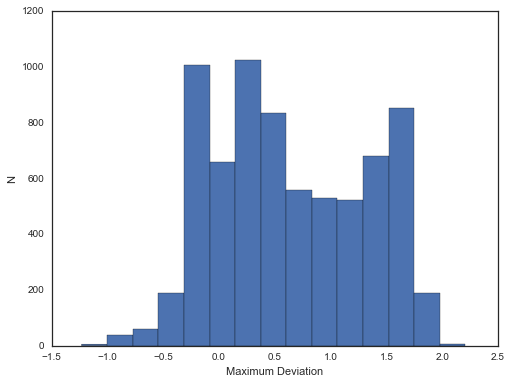

In [7]:
plt.hist(data.md, bins=15)
plt.xlabel("Maximum Deviation")
plt.ylabel("N")
plt.show()

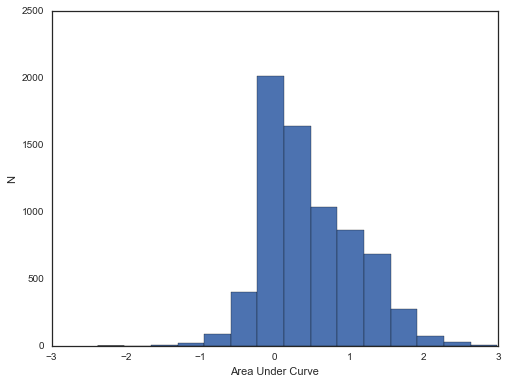

In [8]:
plt.hist(data.auc, bins=15)
plt.xlabel("Area Under Curve")
plt.ylabel("N")
plt.show()

In [18]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc'].mean()

                                          md       auc
truth size  operation SOAcondition                    
False large add       negative      0.770229  0.583380
                      neutral       0.758774  0.574763
            mult      negative      0.715271  0.567314
                      neutral       0.785115  0.587239
      small add       negative      0.825901  0.639869
                      neutral       0.772247  0.593263
            mult      negative      0.687163  0.571068
                      neutral       0.750198  0.601866
True  large add       negative      0.584836  0.372929
                      neutral       0.602261  0.386598
            mult      negative      0.556545  0.374650
                      neutral       0.530129  0.363211
      small add       negative      0.453129  0.318867
                      neutral       0.482353  0.348099
            mult      negative      0.564163  0.390833
                      neutral       0.487964  0.345745


In [19]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc'].std()

                                          md       auc
truth size  operation SOAcondition                    
False large add       negative      0.663439  0.623712
                      neutral       0.676207  0.644182
            mult      negative      0.665775  0.638103
                      neutral       0.672713  0.629299
      small add       negative      0.652484  0.625698
                      neutral       0.682705  0.621932
            mult      negative      0.637636  0.632157
                      neutral       0.652485  0.599938
True  large add       negative      0.685286  0.608512
                      neutral       0.676909  0.561294
            mult      negative      0.660294  0.584939
                      neutral       0.636329  0.589611
      small add       negative      0.676168  0.595500
                      neutral       0.614558  0.564103
            mult      negative      0.670270  0.592395
                      neutral       0.636464  0.580474


In [9]:
# get TRUE Addition trials
dataTrueAdd=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='add')]


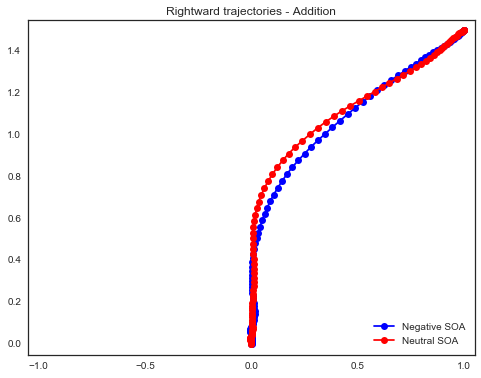

In [10]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueAdd.loc[dataTrueAdd['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

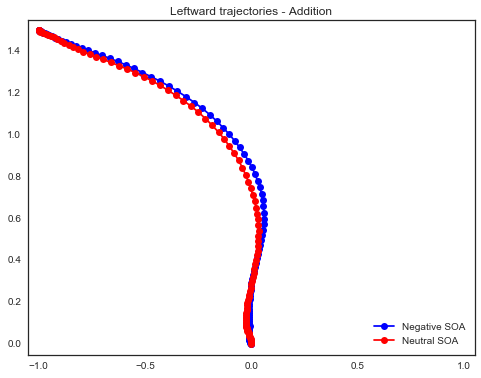

In [11]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueAdd.loc[dataTrueAdd['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

In [12]:
# get TRUE Multiplication trials
dataTrueMult=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='mult')]



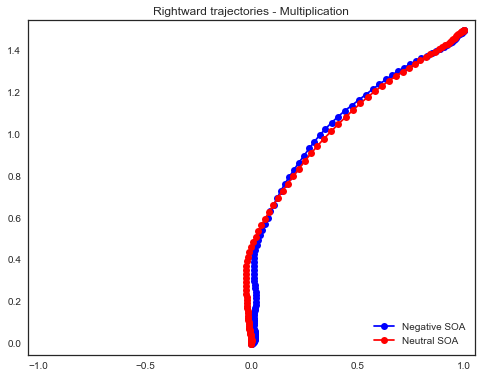

In [13]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueMult.loc[dataTrueMult['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

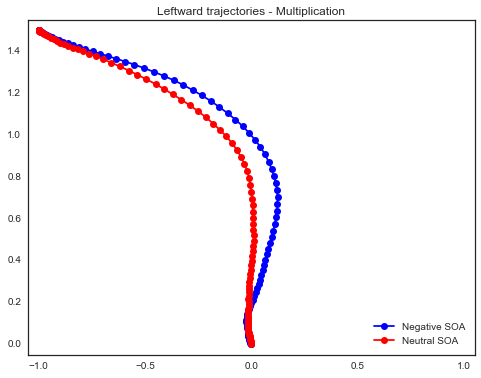

In [14]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueMult.loc[dataTrueMult['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()